6132 Курицын Никита  
Лабораторная работа №6:
Датасет -> https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
   > Датасет должен содержать категориальные и количественные признаки.

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

Датасет и подготовка данных:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Нормализовать численные данные.
   - Разбить выборку на обучающую и тестовую.
     > Из датафреймов обучающей и тестовой выборки необходимо сформировать два набора обучающей и тестовой выборок: с закодированными категориальными признаками и с категориальными признаками без обработки.

Датасет содержит данные клиентов банка. Каждая строка представляет собой запись о клиенте, а каждая колонка - это один из параметров, описывающих клиента. Вот описание всех колонок:

1. **customer_id**: Уникальный идентификатор клиента.
2. **credit_score**: Кредитный рейтинг клиента.
3. **country**: Страна проживания клиента.
4. **gender**: Пол клиента.
5. **age**: Возраст клиента.
6. **tenure**: Стаж (количество лет, которые клиент был клиентом банка).
7. **balance**: Баланс на счете клиента.
8. **products_number**: Количество продуктов банка, которыми пользуется клиент.
9. **credit_card**: Наличие кредитной карты у клиента (1 - есть, 0 - нет).
10. **active_member**: Активность клиента (1 - активный, 0 - неактивный).
11. **estimated_salary**: Оценочная зарплата клиента.
12. **churn**: Флаг ухода клиента (1 - клиент ушел, 0 - клиент остался).

Этот датасет может использоваться для анализа поведения клиентов банка, их характеристик, а также для предсказания вероятности ухода клиентов (churn).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
data = data.dropna()

In [5]:
data.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data =  data.drop('customer_id', axis=1)

In [7]:
X = data.drop('churn', axis=1)
y = data['churn']

In [8]:
X.head(4)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63


In [9]:
from sklearn.model_selection import train_test_split


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X.select_dtypes(include=['float64','int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

scaler = StandardScaler()
X[numeric_features] = pd.DataFrame(scaler.fit_transform(X[numeric_features]),columns=numeric_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = X_train.copy()
encoder = LabelEncoder()
X_train_encoded[categorical_features] = X_train_encoded[categorical_features].apply(encoder.fit_transform)
######

X_test_encoded = X_test.copy()
encoder = LabelEncoder()
X_test_encoded[categorical_features] = X_test_encoded[categorical_features].apply(encoder.fit_transform)

In [11]:
X_test.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
6252,-0.564197,Germany,Male,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.284834,France,Male,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-0.512463,Spain,Female,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-1.495407,Germany,Male,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.936681,Spain,Female,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524


In [12]:
X_test_encoded.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
6252,-0.564197,1,1,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.284834,0,1,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-0.512463,2,0,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-1.495407,1,1,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.936681,2,0,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524


In [13]:
param_grid_ada = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 0.1, 0]
}

param_grid_cb = {
    'iterations': [50, 100],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [3, 1, 5]
}

In [14]:
def grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

Для каждого из классификаторов ($AdaBoost$, $GradientBoostingClassifier$, $XGBoost$, $CatBoost$):
   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.
     > Как минимум основных: `n_estimators`/`iterations`, `learning_rate`, `depth`, параметры регуляризации $L^1$, $L^2$. Для ускорения вычислений можно сразу с заданным значением `early_stopping_rounds` &ndash; тогда понадобится еще выделить валидационный датасет ($XGBoost$) или задать значение `train_size` у $CatBoost$ (часть обучающей выборки пойдет в валидационный набор).
   - Обучить модели $XGBoost$ и $CatBoost$ с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть".
   - Итого получить 6 обученных моделей.
   - Вывести метрики на тестовом наборе (как минимум `classification_report`, другие по желанию).
   - Сравнить модели, выбрать лучшую.
     > Ожидаемый результат &ndash; $XGBoost$/$CatBoost$.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import catboost as cb
ada = AdaBoostClassifier()
best_ada = grid_search(ada, param_grid_ada, X_train_encoded, y_train)

gb = GradientBoostingClassifier()
best_gb = grid_search(gb, param_grid_gb, X_train_encoded, y_train)

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
best_xgb,best_param_xgb = grid_search(xgb_clf, param_grid_xgb, X_train_encoded, y_train)


cb_clf = cb.CatBoostClassifier(cat_features=['country', 'gender'], silent=True)
best_cb,best_param_cat = grid_search(cb_clf, param_grid_cb, X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\nikit\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [16]:
from sklearn.metrics import classification_report
models = {
    "AdaBoost": best_ada[0],
    "GradientBoosting": best_gb[0],
    "XGBoost": best_xgb,
    "CatBoost": best_cb
}

for name, model in models.items():
    y_pred = model.predict(X_test_encoded)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred,digits = 6))

Model: AdaBoost
              precision    recall  f1-score   support

           0   0.863762  0.974487  0.915789      1607
           1   0.780749  0.371501  0.503448       393

    accuracy                       0.856000      2000
   macro avg   0.822255  0.672994  0.709619      2000
weighted avg   0.847450  0.856000  0.834764      2000

Model: GradientBoosting
              precision    recall  f1-score   support

           0   0.880546  0.963286  0.920059      1607
           1   0.756198  0.465649  0.576378       393

    accuracy                       0.865500      2000
   macro avg   0.818372  0.714467  0.748219      2000
weighted avg   0.856112  0.865500  0.852526      2000

Model: XGBoost
              precision    recall  f1-score   support

           0   0.880453  0.967019  0.921708      1607
           1   0.774468  0.463104  0.579618       393

    accuracy                       0.868000      2000
   macro avg   0.827461  0.715062  0.750663      2000
weighted avg   0.85

Лучшая модель с encode: XGBoost(смотрел по accuracy)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      8000 non-null   float64
 1   country           8000 non-null   object 
 2   gender            8000 non-null   object 
 3   age               8000 non-null   float64
 4   tenure            8000 non-null   float64
 5   balance           8000 non-null   float64
 6   products_number   8000 non-null   float64
 7   credit_card       8000 non-null   float64
 8   active_member     8000 non-null   float64
 9   estimated_salary  8000 non-null   float64
dtypes: float64(8), object(2)
memory usage: 687.5+ KB


In [18]:
X_train[['country', 'gender']] = X_train[['country', 'gender']].astype('category')
X_test[['country', 'gender']] = X_test[['country', 'gender']].astype('category')

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      8000 non-null   float64 
 1   country           8000 non-null   category
 2   gender            8000 non-null   category
 3   age               8000 non-null   float64 
 4   tenure            8000 non-null   float64 
 5   balance           8000 non-null   float64 
 6   products_number   8000 non-null   float64 
 7   credit_card       8000 non-null   float64 
 8   active_member     8000 non-null   float64 
 9   estimated_salary  8000 non-null   float64 
dtypes: category(2), float64(8)
memory usage: 578.4 KB


In [20]:

model_xgb_no_procData = xgb.XGBClassifier(**best_param_xgb,enable_categorical=True, eval_metric='logloss')
model_xgb_no_procData.fit(X_train, y_train)
model_cat_no_procData = cb.CatBoostClassifier(**best_param_cat,cat_features=['country', 'gender'], silent=True).fit(X_train, y_train)

In [21]:

y_pred = model_xgb_no_procData.predict(X_test)
print(f"Model: XGB_Noencoded ")
print(classification_report(y_test, y_pred,digits = 6))

Model: XGB_Noencoded 
              precision    recall  f1-score   support

           0   0.881984  0.962663  0.920559      1607
           1   0.756098  0.473282  0.582160       393

    accuracy                       0.866500      2000
   macro avg   0.819041  0.717973  0.751359      2000
weighted avg   0.857247  0.866500  0.854064      2000



In [22]:
y_pred = model_cat_no_procData.predict(X_test)
print(f"Model: CAt_Noencoded ")
print(classification_report(y_test, y_pred,digits = 6))

Model: CAt_Noencoded 
              precision    recall  f1-score   support

           0   0.879841  0.961419  0.918822      1607
           1   0.745902  0.463104  0.571429       393

    accuracy                       0.863500      2000
   macro avg   0.812871  0.712262  0.745126      2000
weighted avg   0.853522  0.863500  0.850560      2000



Encode еще лучше

Важность признаков:
   - С использованием `shap.TreeExplainer` получить $SHAP$-значения для лучшей модели.
   - Построить график `shap.plots.force` для одного объекта выборки и для среза произвольного размера.
   - Построить график `shap.plots.bar` для одного объекта выборки.
   - Построить график `shap.plots.waterfall` для одного объекта выборки.
   - Построить 2 графика `shap.plots.scatter` для какого-нибудь признака. На одном раскрасить относительно себя, на втором &ndash; относительно другого признака.
   - Построить график `shap.plots.beeswarm` для всех признаков.
   - Построить график `shap.plots.bar` для всех признаков.
   - На основании двух последних графиков и/или используя `feature_importance` отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель.
   - Сравнить метрики до и после фильтрации.
   - Визуализировать полученное дерево решений.

In [23]:
import shap

In [31]:
X_tshap = X_train_encoded.iloc[:800, :]# долго считалось, решил обрезать для графиков

In [32]:
X_tshap

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,0.367013,0,1,-0.660018,0.341352,-1.225848,0.807737,0.646092,0.970243,1.373784
1561,-0.191713,1,1,0.293517,-0.350204,0.691389,0.807737,0.646092,0.970243,1.667407
1670,-0.947028,2,1,-1.422847,-0.695982,0.613102,-0.911583,0.646092,-1.030670,-0.246910
6087,-0.926334,0,0,-1.136786,1.378686,0.948021,-0.911583,0.646092,-1.030670,0.921446
6669,-1.381593,0,1,1.628468,1.378686,1.052363,-0.911583,-1.547768,-1.030670,-1.053812
...,...,...,...,...,...,...,...,...,...,...
8813,2.063884,1,0,-1.232140,1.032908,0.747511,-0.911583,0.646092,-1.030670,-0.446286
9002,-0.471076,0,1,-0.278604,0.687130,0.838913,-0.911583,0.646092,-1.030670,1.573676
6622,-0.947028,0,0,0.388871,-1.387538,-1.225848,-0.911583,-1.547768,0.970243,-0.233985
1443,-0.978068,0,0,0.388871,0.341352,-1.225848,2.527057,-1.547768,-1.030670,0.435844


In [33]:
model = best_xgb
treeexplainer = shap.TreeExplainer(model)
values = treeexplainer.shap_values(X_tshap)
shap.initjs()
shap.force_plot(treeexplainer.expected_value, values[0, :], X_tshap.iloc[0, :])

In [34]:
shap.initjs()
shap.force_plot(treeexplainer.expected_value, values, X_tshap)

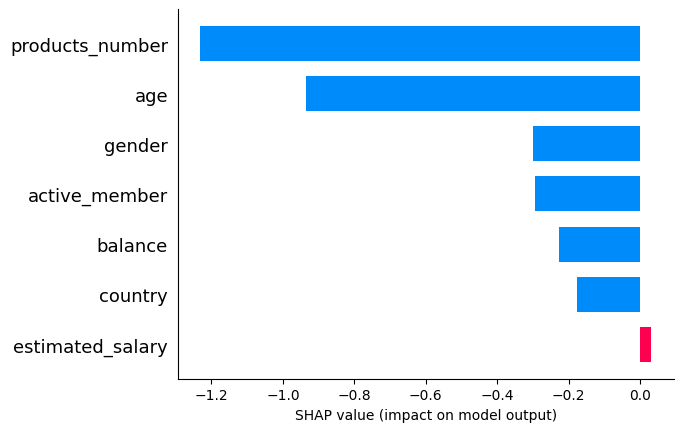

In [35]:
shap.initjs()
shap.bar_plot(values[0, :], feature_names=X_train_encoded.columns)

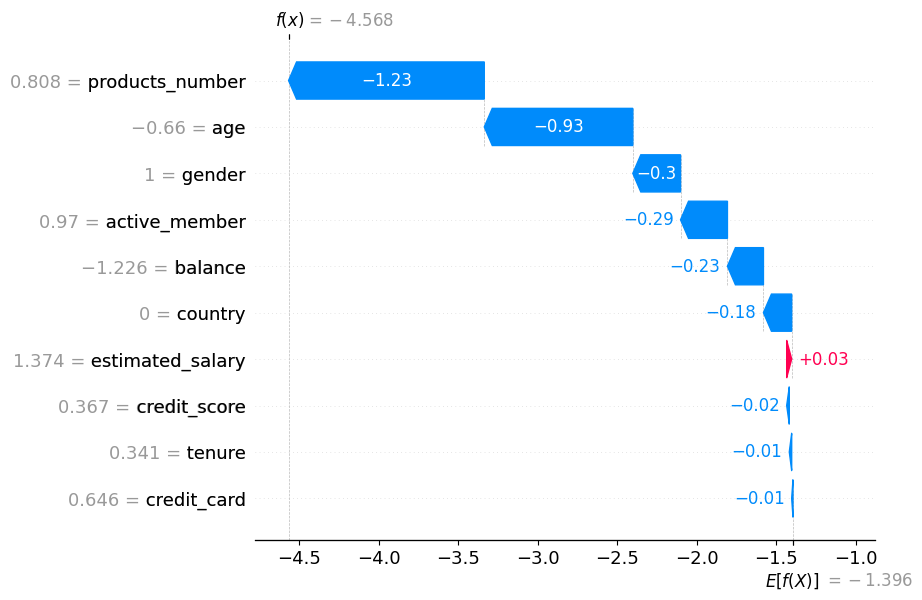

In [37]:
shap.initjs()
shap_exp = shap.Explanation(values=values[0, :], base_values=treeexplainer.expected_value, data=X_train_encoded.iloc[0, :], feature_names=X_train_encoded.columns)
shap.plots.waterfall(shap_exp)


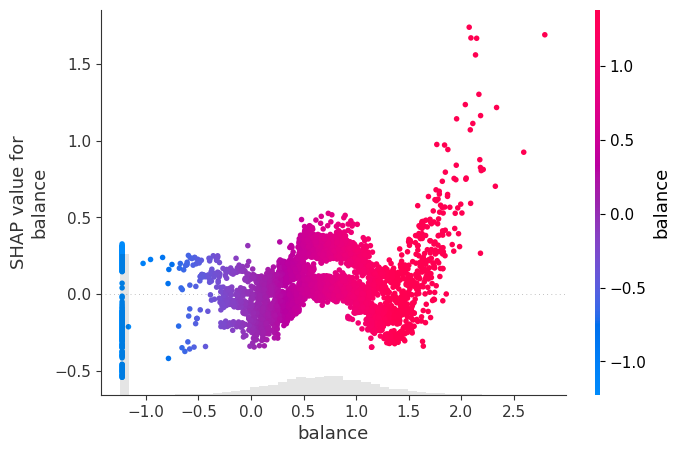

In [38]:
feature_of_interest = 'balance'
shap.initjs()
shap.plots.scatter(treeexplainer(X_train_encoded)[:, feature_of_interest], color=treeexplainer(X_train_encoded)[:, feature_of_interest])

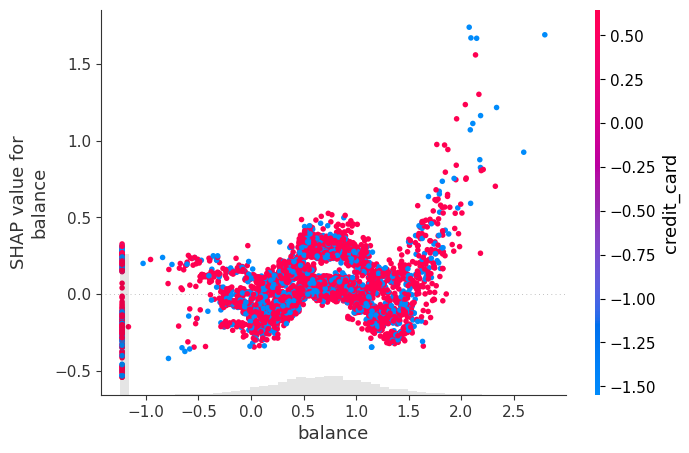

In [39]:
feature_of_interest2 = 'credit_card'
shap.initjs()
shap.plots.scatter(treeexplainer(X_train_encoded)[:, feature_of_interest], color=treeexplainer(X_train_encoded)[:, feature_of_interest2])

<Axes: xlabel='SHAP value (impact on model output)'>

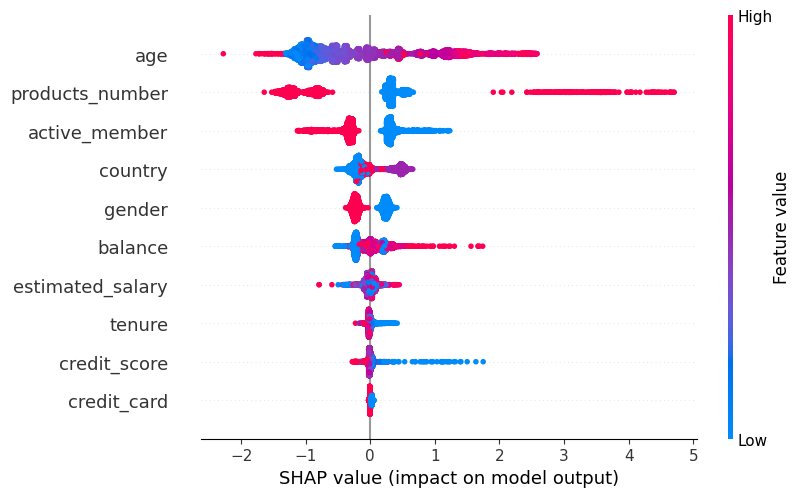

In [40]:
shap.plots.beeswarm(treeexplainer(X_train_encoded), max_display=X_train_encoded.shape[1], show=False)

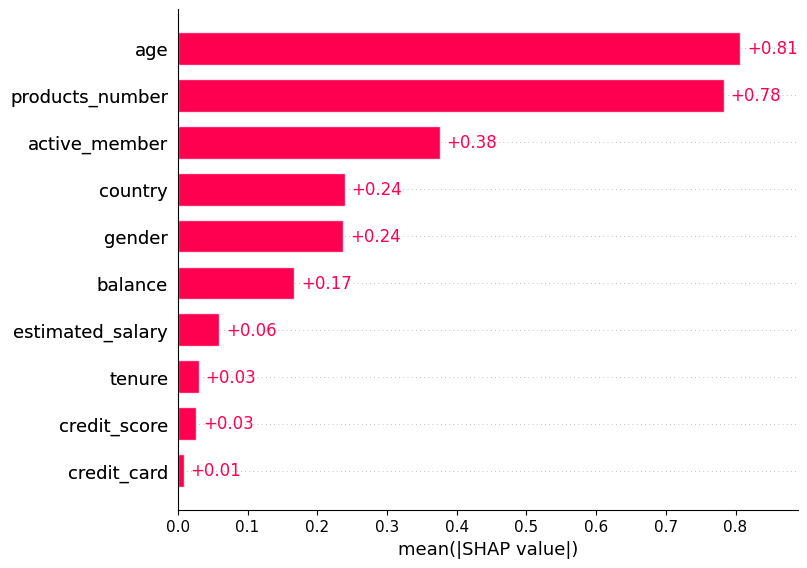

In [41]:
shap_bp = shap.plots.bar(treeexplainer(X_train_encoded), max_display=X_train_encoded.shape[1])

In [42]:
importance = pd.DataFrame({'Feature': X_train_encoded.columns,'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

In [43]:
print(importance)

            Feature  Importance
6   products_number    0.242611
3               age    0.239308
8     active_member    0.226227
2            gender    0.069997
1           country    0.068291
5           balance    0.064306
0      credit_score    0.024299
4            tenure    0.022941
9  estimated_salary    0.022052
7       credit_card    0.019968


In [48]:
new_features = importance[importance['Importance'] > 0.024]['Feature']

In [50]:
new_features

6    products_number
3                age
8      active_member
2             gender
1            country
5            balance
0       credit_score
Name: Feature, dtype: object

In [53]:
X_train_important= X_train_encoded[new_features]
X_test_important = X_test_encoded[new_features]

In [55]:
xgb_new = xgb.XGBClassifier(**best_param_xgb, random_state=42, eval_metric='logloss')
xgb_new.fit(X_train_important, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [57]:
y_pred_filtered = xgb_new.predict(X_test_important)
print(classification_report(y_test, y_pred_filtered,digits = 6))

              precision    recall  f1-score   support

           0   0.882118  0.963908  0.921201      1607
           1   0.762295  0.473282  0.583987       393

    accuracy                       0.867500      2000
   macro avg   0.822207  0.718595  0.752594      2000
weighted avg   0.858573  0.867500  0.854939      2000



Метрики немного ухудшились

5. Регрессия:
   - С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели линейной регрессии с использованием $XGBoost$ или $CatBoost$.
     > [xgboost.XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor) в $XGBoost$, [CatBoostRegressor](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor) в $CatBoost$. В целом, можно выбрать новый таргет из уже полученного разбиения на обучающую и тестовыую выборки из пункта 2.
   - Вывести метрики $MSE$, $MAE$ и $R^2$ на тестовом наборе.
   - Переобучить модель на отфильтрованном наборе признаков из пункта 4.
   - Сравнить метрики до и после фильтрации.

In [77]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data =  data.drop('customer_id', axis=1)
numeric_features = data.select_dtypes(include=['float64','int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
scaler = StandardScaler()
encoder = LabelEncoder()
data[numeric_features] = scaler.fit_transform(data[numeric_features])
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

In [78]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [79]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,2,0,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,0,0,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,0,0,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,2,0,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,-1.391939,0,1,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,0.604988,0,0,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.256835,1,1,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


In [128]:
target = 'age'

In [129]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data.drop(columns=[target]), data[target], test_size=0.2, random_state=42)

In [130]:
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_reg = xgb.XGBRegressor(random_state=42)
grid_reg = GridSearchCV(xgb_reg, xgb_params, cv=5, scoring='neg_mean_squared_error')
grid_reg.fit(X_train_new, y_train_new)
xgb_best_reg = grid_reg.best_estimator_
xgb_best_reg.fit(X_train_new, y_train_new)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [131]:
# Прогнозирование на тестовом наборе
y_pred_xgb = xgb_best_reg.predict(X_test_new)

# Вычисление метрик
mse_xgb = mean_squared_error(y_test_new, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_new, y_pred_xgb)
r2_xgb = r2_score(y_test_new, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}, R^2: {r2_xgb}")


XGBoost - MSE: 0.877188718439508, MAE: 0.6941231844940657, R^2: 0.10142678028080243


In [132]:
X_train_new

,credit_score,country,gender,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9254,0.367013,0,1,0.341352,-1.225848,0.807737,0.646092,0.970243,1.373784,-0.505775
1561,-0.191713,1,1,-0.350204,0.691389,0.807737,0.646092,0.970243,1.667407,-0.505775
1670,-0.947028,2,1,-0.695982,0.613102,-0.911583,0.646092,-1.030670,-0.246910,1.977165
6087,-0.926334,0,0,1.378686,0.948021,-0.911583,0.646092,-1.030670,0.921446,1.977165
6669,-1.381593,0,1,1.378686,1.052363,-0.911583,-1.547768,-1.030670,-1.053812,1.977165
...,...,...,...,...,...,...,...,...,...,...
5734,1.215448,0,1,1.032908,-0.108554,-0.911583,0.646092,0.970243,-0.534002,-0.505775
5191,0.325625,0,0,-1.387538,-1.225848,-0.911583,0.646092,0.970243,-1.728184,-0.505775
5390,0.874005,0,0,-1.387538,-1.225848,2.527057,-1.547768,-1.030670,-0.136854,1.977165
860,0.170424,0,1,1.032908,1.822949,-0.911583,0.646092,-1.030670,-0.044902,1.977165


In [133]:
new_features

6    products_number
3                age
8      active_member
2             gender
1            country
5            balance
0       credit_score
Name: Feature, dtype: object

In [134]:
X_train_filt_last = X_train_new[new_features.drop(index=3)]
X_test_filt_last = X_test_new[new_features.drop(index=3)]

In [137]:
xgb_best_reg_filt = grid_reg.best_estimator_
xgb_best_reg_filt.fit(X_train_filt_last,y_train_new)
y_pred_xgb_filtered = xgb_best_reg.predict(X_test_filt_last)


mse_xgb_filtered = mean_squared_error(y_test_new, y_pred_xgb_filtered)
mae_xgb_filtered = mean_absolute_error(y_test_new, y_pred_xgb_filtered)
r2_xgb_filtered = r2_score(y_test_new, y_pred_xgb_filtered)

print(f"XGBoost (отфильтрованные признаки) - MSE: {mse_xgb_filtered}, MAE: {mae_xgb_filtered}, R^2: {r2_xgb_filtered}")


XGBoost (отфильтрованные признаки) - MSE: 0.9527532526754795, MAE: 0.734448541992487, R^2: 0.02402009982805897


In [138]:
print("Сравнение метрик до и после фильтрации признаков:")
print(f"XGBoost - MSE: {mse_xgb} -> {mse_xgb_filtered}")
print(f"XGBoost - MAE: {mae_xgb} -> {mae_xgb_filtered}")
print(f"XGBoost - R^2: {r2_xgb} -> {r2_xgb_filtered}")

Сравнение метрик до и после фильтрации признаков:
XGBoost - MSE: 0.877188718439508 -> 0.9527532526754795
XGBoost - MAE: 0.6941231844940657 -> 0.734448541992487
XGBoost - R^2: 0.10142678028080243 -> 0.02402009982805897


Метрики ухудшились